# The main objective of this analysis is to identify if the objects near earth are hazardous or not. 

In order to get this we use the Nearest Earth Objects dataset downloaded from Kaggle.com and provided NASA

## To begin we insert the data and take a first glance of the data

In [1]:
import pandas as pd
path = "neo.csv"
Nasa = pd.read_csv(path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Nasa.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
Nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


The columns are the id and name of the object. It's estimated minimum and maximum diameter. It's velocity relative velocity to earth. The distance in kilometers missed. The orbiting body, If they are a sentry object or not. absolute_magnitude describes it's intrinsic luminosity. The last column it's the objective column which tell's us if the object it's hazardous or not.

In [5]:
Nasa.orbiting_body.value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [6]:
Nasa.sentry_object.value_counts()

False    90836
Name: sentry_object, dtype: int64

In [7]:
Nasa.hazardous.value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [8]:
8840/90836

0.09731824386806993

In [9]:
Nasa.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


As we can see the orbiting_body and sentry_object columns don't seem very usefull because they only say that every object orbits the earth and that none of them are sentry. We might find some use in the id or the name column to sort or divide the data though. So we drop the former and keep the latter for now.

In [10]:
Nasa_relevant = Nasa.drop(['id','name','orbiting_body','sentry_object'],axis = 1)

In [11]:
Nasa_relevant

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


# We divide into train and test set but doing it into an stratified split

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Nasa_relevant,Nasa_relevant['hazardous']):
    strat_train_set = Nasa_relevant.loc[train_index]
    strat_test_set = Nasa_relevant.loc[test_index]

And now we check if the data is really stratified for train and test sets comparing them with the proportions in the original dataset

In [13]:
Nasa['hazardous'].value_counts()/len(Nasa)

False    0.902682
True     0.097318
Name: hazardous, dtype: float64

In [14]:
strat_train_set['hazardous'].value_counts()/len(strat_train_set)

False    0.902681
True     0.097319
Name: hazardous, dtype: float64

In [15]:
strat_test_set['hazardous'].value_counts()/len(strat_test_set)

False    0.902686
True     0.097314
Name: hazardous, dtype: float64

We see that indeed they have the same proportions 

# We now copy and transform the categorical (and in this case the objective) data

First we copy the train set to transform it without harming it:

And in order to deal with categorical data and numerical separately we divide them

In [16]:
nasa = strat_train_set.drop("hazardous",axis=1)
nasa_labels = strat_train_set[['hazardous']].copy() 

In [17]:
nasa_labels

,hazardous
2639,False
29138,False
36927,False
61855,False
15916,False
...,...
29491,False
18373,False
25031,False
35456,False


#### One hot encoding is chosen because the categorical data has no direction but the result will be similar to OrdinalEncoder so we'll do it with OE

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
nasa_labels_oe = pd.DataFrame(oe.fit_transform(nasa_labels))

In [19]:
nasa_labels_oe.columns = ['hazardous']
nasa_labels_oe

,hazardous
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
72663,0.0
72664,0.0
72665,0.0
72666,0.0


In [20]:
nasa_labels_oe.hazardous.value_counts()

0.0    65596
1.0     7072
Name: hazardous, dtype: int64

### In order to choose a the proper way to deal with numerical data we need to identify the outliers, how many are of them and in which features

In [21]:
nasa.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,72668.000000,72668.000000,72668.000000,7.266800e+04,72668.000000
mean,0.128198,0.286658,48056.341395,3.709139e+07,23.525409
std,0.313486,0.700976,25257.037962,2.235471e+07,2.898315
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28632.338106,1.720310e+07,21.340000
50%,0.048368,0.108153,44244.808278,3.789466e+07,23.700000
75%,0.143402,0.320656,62906.940878,5.658472e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


First thing we note is that we have a wide standard deviation in each case es quite big so we have very disperse data. Also the minimum and maximum are separed for one to five orders of magnitude and the mean it's quite low compared with the maximum so we have some outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95d38c1e20>,
      dtype=object)

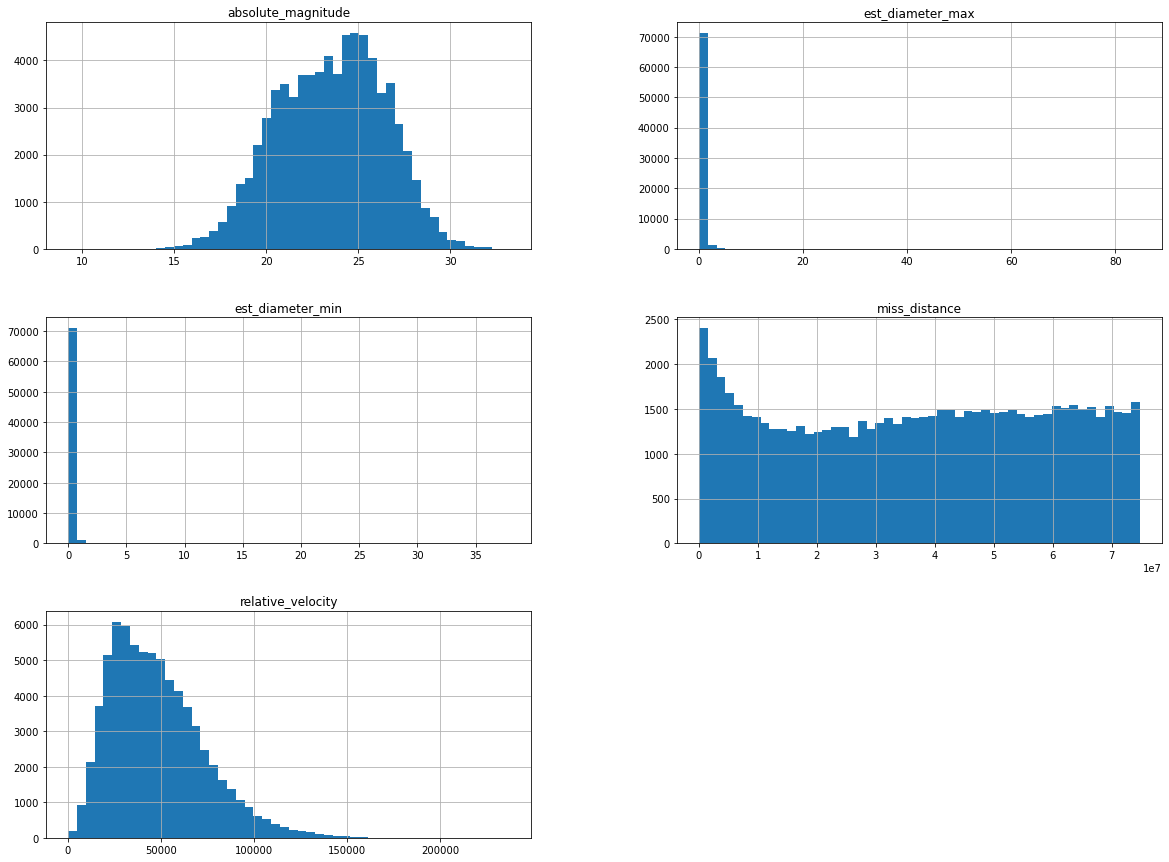

In [22]:
#import seaborn as sns
nasa.hist(bins=50,figsize=(20,15))

We can also see that the data is skewed(biased) for almost every feature and that we have maybe a relevant number of outliers. Also the miss distance doesn't seem to have a distribution.

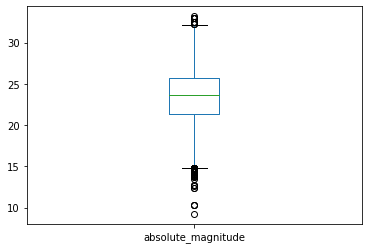

In [23]:
nasa['absolute_magnitude'].plot(kind='box')

[]

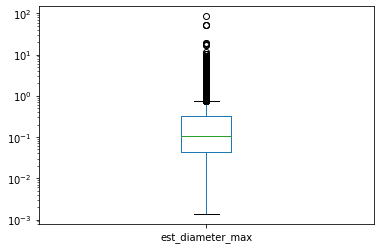

In [24]:
nasa['est_diameter_max'].plot(kind='box')
plt.semilogy()#switch y to logaritmic scale

[]

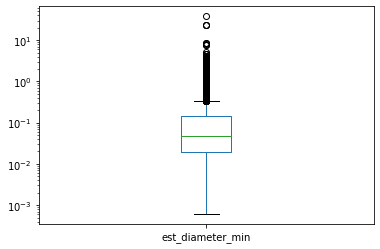

In [25]:
nasa['est_diameter_min'].plot(kind='box')
plt.semilogy()#switch y to logaritmic scale

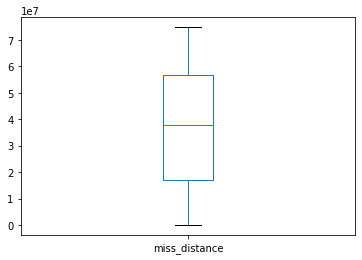

In [26]:
nasa['miss_distance'].plot(kind='box')

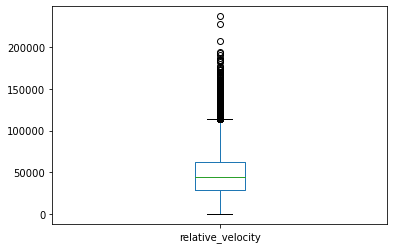

In [27]:
nasa['relative_velocity'].plot(kind='box')

So there seems to be quite a few outliers for every parameter except for miss_distance

In [28]:
def find_outliers_IQR(df):#to calculate interquartile range
    q1=df.quantile(0.25) #Return values at the given quantile over requested axis. finds 25 percent quartile
    q3=df.quantile(0.75) #finds 75 percent quartile
    IQR=q3-q1 #quartile difference
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]#Using the IQR, the outlier data points are the ones
    #falling below q1 – 1.5*IQR or above q3 + 1.5*IQR.
    return outliers

In [29]:
outliers_absolute_magnitude = find_outliers_IQR(nasa['absolute_magnitude'])
print("number of outliers: "+ str(len(outliers_absolute_magnitude)))
print("max outlier value: "+ str(outliers_absolute_magnitude.max()))
print("min outlier value: "+ str(outliers_absolute_magnitude.min()))

number of outliers: 80
max outlier value: 33.2
min outlier value: 9.23


In [30]:
outliers_est_diameter_max = find_outliers_IQR(nasa['est_diameter_max'])
print("number of outliers: "+ str(len(outliers_est_diameter_max)))
print("max outlier value: "+ str(outliers_est_diameter_max.max()))
print("min outlier value: "+ str(outliers_est_diameter_max.min()))

number of outliers: 6696
max outlier value: 84.7305408852
min outlier value: 0.7379721606999999


In [31]:
outliers_est_diameter_min = find_outliers_IQR(nasa['est_diameter_min'])
print("number of outliers: "+ str(len(outliers_est_diameter_min)))
print("max outlier value: "+ str(outliers_est_diameter_min.max()))
print("min outlier value: "+ str(outliers_est_diameter_min.min()))

number of outliers: 6696
max outlier value: 37.8926498379
min outlier value: 0.3300311834


In [32]:
outliers_miss_distance = find_outliers_IQR(nasa['miss_distance'])
print("number of outliers: "+ str(len(outliers_miss_distance)))
print("max outlier value: "+ str(outliers_miss_distance.max()))
print("min outlier value: "+ str(outliers_miss_distance.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [33]:
outliers_relative_velocity = find_outliers_IQR(nasa['relative_velocity'])
print("number of outliers: "+ str(len(outliers_relative_velocity)))
print("max outlier value: "+ str(outliers_relative_velocity.max()))
print("min outlier value: "+ str(outliers_relative_velocity.min()))

number of outliers: 1240
max outlier value: 236990.12808786661
min outlier value: 114348.57520719561


In [34]:
len(outliers_est_diameter_min)/len(nasa['relative_velocity'])

0.09214509825507788

So we have at most 9% of outliers. We could deal with the outliers through different strategies like drop them, cap them or replace them using imputation as if they were missing values. But we consider that in this particular case outliers are meaningfull so we're gonna keep them and see how the analysis results.

Due to this we're gonna use standarization instead of Normalization to deal with the difference on scales.

In [35]:
names=nasa.columns#to get column names

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
nasa_ss=pd.DataFrame(ss.fit_transform(nasa))
nasa_ss.columns = nasa.columns

In [37]:
nasa_ss

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,-0.331616,-0.331616,-0.188160,0.494297,0.577785
1,-0.312486,-0.312486,-1.040729,0.866716,0.412170
2,0.234246,0.234246,2.427134,1.219399,-1.009355
3,0.101960,0.101960,1.205148,0.843963,-0.836840
4,-0.386643,-0.386643,-1.147355,0.056145,1.509367
...,...,...,...,...,...
72663,-0.400466,-0.400466,-1.117694,0.064301,2.233931
72664,-0.079077,-0.079077,1.377851,1.612734,-0.509061
72665,-0.378159,-0.378159,-0.546884,0.245400,1.267846
72666,0.296300,0.296300,-1.128369,-0.696130,-1.078361


In [38]:
nasa_reunited =pd.concat([nasa_ss,nasa_labels_oe],axis=1)
nasa_reunited

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,-0.331616,-0.331616,-0.188160,0.494297,0.577785,0.0
1,-0.312486,-0.312486,-1.040729,0.866716,0.412170,0.0
2,0.234246,0.234246,2.427134,1.219399,-1.009355,0.0
3,0.101960,0.101960,1.205148,0.843963,-0.836840,0.0
4,-0.386643,-0.386643,-1.147355,0.056145,1.509367,0.0
...,...,...,...,...,...,...
72663,-0.400466,-0.400466,-1.117694,0.064301,2.233931,0.0
72664,-0.079077,-0.079077,1.377851,1.612734,-0.509061,0.0
72665,-0.378159,-0.378159,-0.546884,0.245400,1.267846,0.0
72666,0.296300,0.296300,-1.128369,-0.696130,-1.078361,0.0


Now we can see the correlation matrix for each value

In [39]:
corr_matrix = nasa_reunited.corr()
corr_matrix['hazardous'].sort_values(ascending=False)

hazardous             1.000000
relative_velocity     0.188468
est_diameter_max      0.172543
est_diameter_min      0.172543
miss_distance         0.043163
absolute_magnitude   -0.363863
Name: hazardous, dtype: float64

And so we see that the miss distance could be the less correlated feature

# Now it's the moment to choose and train the model we'll use

We'll try to identify the hazardous using different models

In [40]:
y = nasa_labels_oe

In [41]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(nasa_ss,y.values.ravel())

SGDClassifier(random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(nasa_ss, y.values.ravel())

DecisionTreeClassifier()

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(nasa_ss,y.values.ravel())

RandomForestClassifier()

In [44]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(nasa_ss,y.values.ravel())

SVC()

# And now let's evaluate the models

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, nasa_ss, y.values.ravel(),cv=3, scoring="accuracy")

array([0.90269578, 0.9026545 , 0.90269177])

We now do some predictions in order to compute a confusion matrix as another test to evaluate our model using cross_val_predict which uses K-fold cross validation and returns predictions made on each test fold in order to get a confusion matrix

In [46]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sgdc = cross_val_predict(sgd_clf, nasa_ss,y.values.ravel(),cv=3)

In [47]:
y_train_pred_tree = cross_val_predict(tree_clf, nasa_ss,y.values.ravel(),cv=3)

In [48]:
y_train_pred_forest = cross_val_predict(forest_clf, nasa_ss, y.values.ravel(),cv=3) 

In [49]:
y_train_pred_svc = cross_val_predict(svm_clf, nasa_ss, y.values.ravel(), cv=3)

In [50]:
y.hazardous.value_counts()

0.0    65596
1.0     7072
Name: hazardous, dtype: int64

Now we're ready to get the confusion matrix

#### For SGD (Stochastic Gradient Descent) Classifier

In [51]:
from sklearn.metrics import confusion_matrix
cm_sgdc=confusion_matrix(y.values.ravel(),y_train_pred_sgdc)
cm_sgdc

array([[65596,     0],
       [ 7072,     0]])

#### For decision tree classifier

In [52]:
cm_dtc=confusion_matrix(y.values.ravel(),y_train_pred_tree)
cm_dtc

array([[61628,  3968],
       [ 3907,  3165]])

#### For random forest classifier

In [53]:
cm_rfc=confusion_matrix(y.values.ravel(),y_train_pred_forest)
cm_rfc

array([[63777,  1819],
       [ 4285,  2787]])

#### for SVC

In [54]:
cm_svc=confusion_matrix(y.values.ravel(),y_train_pred_svc)
cm_svc

array([[65371,   225],
       [ 6315,   757]])

And now we check for metrics to evaluate the models

In [55]:
print(cm_dtc[1,1]/(cm_dtc[1,1]+cm_dtc[0,1]),cm_dtc[1,1]/(cm_dtc[1,1]+cm_dtc[1,0]))
print(cm_rfc[1,1]/(cm_rfc[1,1]+cm_rfc[0,1]),cm_rfc[1,1]/(cm_rfc[1,1]+cm_rfc[1,0]))

0.4437123230057479 0.447539592760181
0.6050803300043421 0.3940893665158371


In [56]:
from sklearn.metrics import precision_score, recall_score
print("The accuracy of positive predictions for each model is")
print("precision=TP/(TP+FP) for sgdc",precision_score(y.values.ravel(),y_train_pred_sgdc))
print("precision=TP/(TP+FP) for dtc",precision_score(y.values.ravel(),y_train_pred_tree))
print("precision=TP/(TP+FP) for rfc",precision_score(y.values.ravel(),y_train_pred_forest))
print("precision=TP/(TP+FP) for svc",precision_score(y.values.ravel(),y_train_pred_svc))

The accuracy of positive predictions for each model is
precision=TP/(TP+FP) for sgdc 0.0
precision=TP/(TP+FP) for dtc 0.4437123230057479
precision=TP/(TP+FP) for rfc 0.6050803300043421
precision=TP/(TP+FP) for svc 0.7708757637474541


/home/axl/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print("The true positive rate, this is the ratio of positive instances that are correctly detected for each model is")
print("recall=TP/(TP+FN) for sgdc",recall_score(y.values.ravel(),y_train_pred_sgdc))
print("recall=TP/(TP+FN) for dtc",recall_score(y.values.ravel(),y_train_pred_tree))
print("recall=TP/(TP+FN) for rfc",recall_score(y.values.ravel(),y_train_pred_forest))
print("recall=TP/(TP+FN) for svc",recall_score(y.values.ravel(),y_train_pred_svc))

The true positive rate, this is the ratio of positive instances that are correctly detected for each model is
recall=TP/(TP+FN) for sgdc 0.0
recall=TP/(TP+FN) for dtc 0.447539592760181
recall=TP/(TP+FN) for rfc 0.3940893665158371
recall=TP/(TP+FN) for svc 0.1070418552036199


So sgdc for this model is useless as it was processed. Maybe a different take in the manage of outliers would improve this score.

Meanwhile the decision tree regressor when it claims an object is hazardous it is correct only 44.3% of the time and only detects 45.1% of the hazardous. On the other hand a random_forest_classifier it's correct on 60% of the time and only detects 39.4% of the hazardous ones. Besides SVC it's correct 77% of the time but only detects 10% of the hazardous.

So it seems more important to detect more frequently the hazardous ones instead of it being a good classifier

We can also calculate the $F_{1}$ score which is the harmonic mean of precision and recall. This score combines the precision and recall and gives much more weight to low values. As a result the classifier only get a high $F_{1}$ score if both recall precision are high 

$\begin{equation} 
F_{1} = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}
\end{equation}$

$F_{1}$ score favors classifiers that have similar precision and recall

In [58]:
from sklearn.metrics import f1_score
print("The harmonic mean of precision and recall is: ")
print("F1=TP/(TP+(FN+FP)/2) for sgdc",f1_score(y.values.ravel(),y_train_pred_sgdc))
print("F1=TP/(TP+(FN+FP)/2) for dtc",f1_score(y.values.ravel(),y_train_pred_tree))
print("F1=TP/(TP+(FN+FP)/2) for rfc",f1_score(y.values.ravel(),y_train_pred_forest))
print("F1=TP/(TP+(FN+FP)/2) for rfc",f1_score(y.values.ravel(),y_train_pred_svc))

The harmonic mean of precision and recall is: 
F1=TP/(TP+(FN+FP)/2) for sgdc 0.0
F1=TP/(TP+(FN+FP)/2) for dtc 0.4456177402323126
F1=TP/(TP+(FN+FP)/2) for rfc 0.4773077581777701
F1=TP/(TP+(FN+FP)/2) for rfc 0.18798112739011671


### Now we would like to try different thresholds for the classification into the decision function

In [59]:
y_scores_sgdc = cross_val_predict(sgd_clf,nasa_ss,y.values.ravel(),cv=3, method="decision_function")

In [60]:
y_scores_tree = cross_val_predict(tree_clf,nasa_ss,y.values.ravel(),cv=3, method="predict_proba")

In [61]:
y_scores_forest = cross_val_predict(forest_clf,nasa_ss,y.values.ravel(),cv=3, method="predict_proba")

In [62]:
y_scores_svc = cross_val_predict(svm_clf,nasa_ss,y.values.ravel(),cv=3, method="decision_function")

With these scores we use the precision_recall_value() function to compute precision and recall for all posible thresholds

In [63]:
from sklearn.metrics import precision_recall_curve
precisions_sgdc, recalls_sgdc, thresholds_sgdc = precision_recall_curve(y.values.ravel(),y_scores_sgdc)
precisions_tree, recalls_tree, thresholds_tree = precision_recall_curve(y.values.ravel(),y_scores_tree[:,1])
precisions_svc, recalls_svc, thresholds_svc = precision_recall_curve(y.values.ravel(),y_scores_svc)

In [64]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()

In [65]:
c=precisions_sgdc.copy()

In [66]:
c=np.delete(c,-1)

In [67]:
max(c) #maximum precision obtained by the model

0.39473684210526316

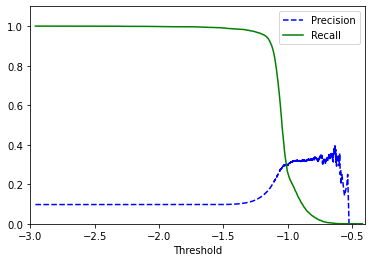

In [68]:
plot_precision_recall_vs_threshold(precisions_sgdc, recalls_sgdc, thresholds_sgdc)
plt.xlabel("Threshold")
plt.xlim(-3,-0.4)
plt.ylim(0.0,1.1)
plt.show()

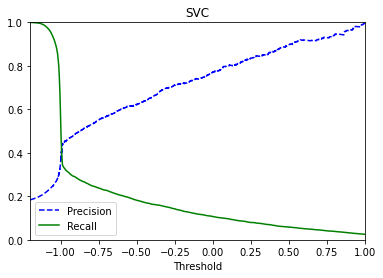

In [69]:
plot_precision_recall_vs_threshold(precisions_svc, recalls_svc, thresholds_svc)
plt.title("SVC")
plt.xlabel("Threshold")
plt.xlim(-1.2,1.)
plt.ylim(0.0,1.)
plt.show()

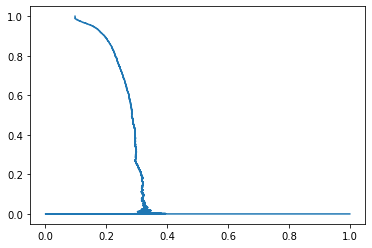

In [70]:
plt.plot(precisions_sgdc,recalls_sgdc)

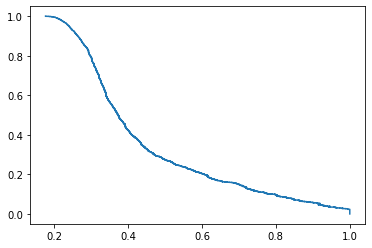

In [71]:
plt.plot(precisions_svc,recalls_svc)

To find a threshold for given precision we do the following 

In [72]:
threshold_39_precision_sgdc = thresholds_sgdc[np.argmax(precisions_sgdc >= 0.39)-1]
threshold_39_precision_sgdc

-0.6333931241408866

In [73]:
y_train_pred_39 = (y_scores_sgdc >= -1)

In [74]:
print(precision_score(y.values.ravel(), y_train_pred_39))
print(recall_score(y.values.ravel(), y_train_pred_39))

0.29809415214204266
0.2587669683257919


In the previous model we just moved the threshold but it's still feel something's not compretely ok with applying it with the data processed like we have done.

### Roc curve

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y.values.ravel(), y_scores_sgdc)
fpr_tree, tpr_tree, thresholds_tree =roc_curve(y.values.ravel(),y_scores_tree[:,1])
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y.values.ravel(),y_scores_forest[:,1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y.values.ravel(), y_scores_svc)

In [76]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #dashed diagonal

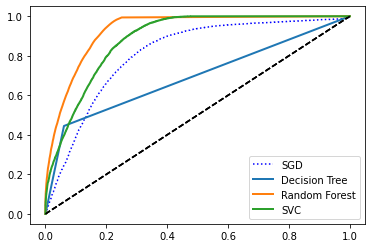

In [77]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plot_roc_curve(fpr_svc,tpr_svc,"SVC")
plt.legend(loc="lower right")
plt.show()

We can also compare the roc area under the curve for each classifier. A perfect classifier will have ROC AUC equalt to 1 and a purely random classifier will have ROC AUC equal to 0.5.

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y.values.ravel(),y_scores_sgdc)

0.8107208858544238

For the sgdc it's don't seem very trustable because without changing the threshold seems like a dumb classifier as it is right now

In [79]:
roc_auc_score(y.values.ravel(),y_scores_tree[:,1])

0.6919520514163345

In [80]:
roc_auc_score(y.values.ravel(),y_scores_forest[:,1])

0.9295974095529635

In [81]:
roc_auc_score(y.values.ravel(),y_scores_svc)

0.8846218451303041

So we can conclude that the random forests is the best classifier for this dataset, followed by svc, decision tree and finally for the stochastic gradient descent. But if we consider that we only have 9% of hazardous elements in the dataset and that the decision tree classifier gets classifies 45% of the hazardous correctly then we conclude that the decision tree classifier is best suited for this task.

#### We can also look for a visual representation of the confusion matrix

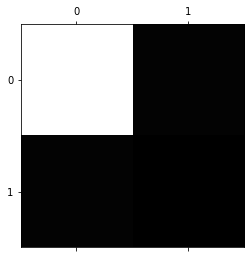

In [82]:
plt.matshow(cm_dtc, cmap=plt.cm.gray)
plt.show()

In [83]:
row_sums = cm_dtc.sum(axis=1,keepdims=True)
norm_cm_dtc = cm_dtc/row_sums

Due to the imbalance in the dataset in this case this seems useless

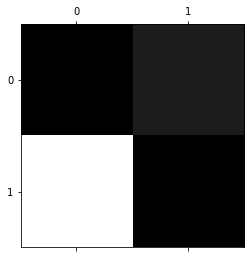

In [84]:
np.fill_diagonal(norm_cm_dtc, 0)
plt.matshow(norm_cm_dtc, cmap=plt.cm.gray)
plt.show()

This tell's us that many 0s are classified as 1s. On the other hand compared with that little 1s are misclassified as 0s